<a href="https://colab.research.google.com/github/lovuinl/LiaVina/blob/main/10524615_2PA35_Lovina_Arwena_Amelia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# ========================
# MK Praktikum Unggulan Universitas Gunadarma
# Mata Kuliah : Praktikum Social Networking & Creative Content (Tingkat 2)
# ========================

In [13]:
# --- Import Libraries ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [14]:
# --- Instruksi 1: Baca dataset ---
url_data = "https://raw.githubusercontent.com/supasonicx/ATA-praktikum-01/main/Starbucks%20satisfactory%20survey%20encode%20cleaned.csv"
data = pd.read_csv(url_data)

In [15]:
# --- Instruksi 2: Lihat 5 baris pertama ---
data.head()

,Id,gender,age,status,income,visitNo,method,timeSpend,location,membershipCard,...,chooseRate,promoMethodApp,promoMethodSoc,promoMethodEmail,promoMethodDeal,promoMethodFriend,promoMethodDisplay,promoMethodBillboard,promoMethodOthers,loyal
0,1,1,1,0,0,3,0,1,0,0,...,3,1,1,1,1,1,1,1,1,0
1,2,1,1,0,0,3,2,0,1,0,...,2,1,1,1,1,1,1,1,1,0
2,3,0,1,2,0,2,0,1,2,0,...,3,1,1,1,1,1,1,1,1,0
3,4,1,1,0,0,3,2,0,2,1,...,3,1,1,1,1,1,1,1,1,1
4,5,0,1,0,0,2,2,1,1,1,...,3,1,1,1,1,1,1,1,1,0


In [16]:
# --- Instruksi 3: Tampilkan dimensi data ---
data.shape

(113, 33)

In [17]:
# --- Instruksi 4: Tampilkan nama kolom ---
data.columns

Index(['Id', 'gender', 'age', 'status', 'income', 'visitNo', 'method',
       'timeSpend', 'location', 'membershipCard', 'itemPurchaseCoffee',
       'itempurchaseCold', 'itemPurchasePastries', 'itemPurchaseJuices',
       'itemPurchaseSandwiches', 'itemPurchaseOthers', 'spendPurchase',
       'productRate', 'priceRate', 'promoRate', 'ambianceRate', 'wifiRate',
       'serviceRate', 'chooseRate', 'promoMethodApp', 'promoMethodSoc',
       'promoMethodEmail', 'promoMethodDeal', 'promoMethodFriend',
       'promoMethodDisplay', 'promoMethodBillboard', 'promoMethodOthers',
       'loyal'],
      dtype='object')

In [18]:
# --- Instruksi 5: Nilai unik kolom timeSpend ---
data['timeSpend'].unique()

array([1, 0, 4, 2, 3])

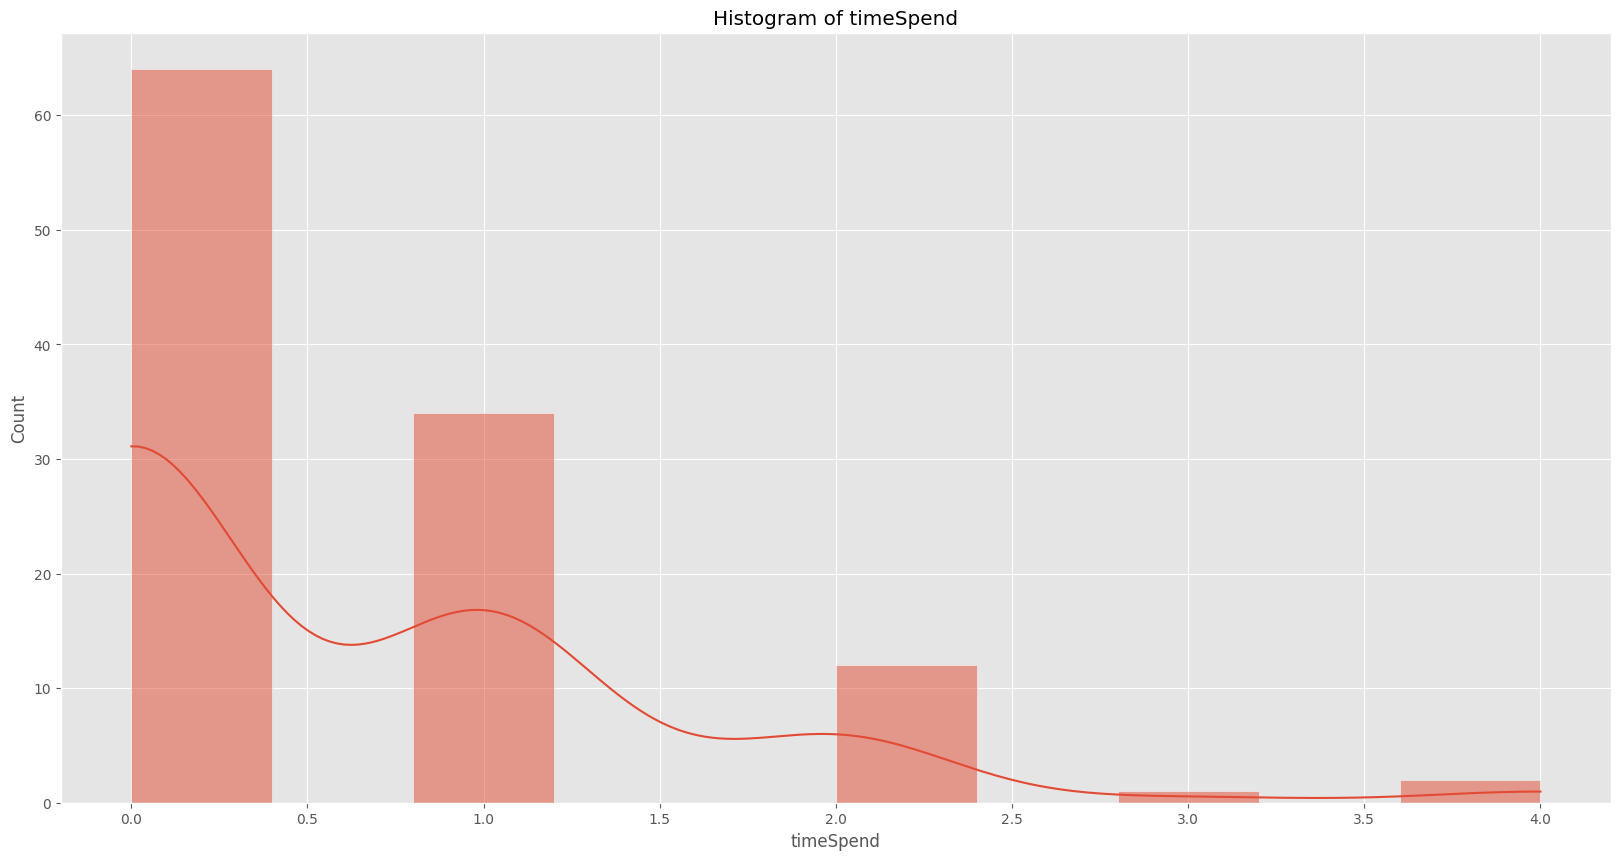

In [19]:
# --- Histogram kolom timeSpend ---
plt.figure(figsize=(20,10))
plt.title('Histogram of timeSpend')
sns.histplot(data, x='timeSpend', kde=True)
plt.show()

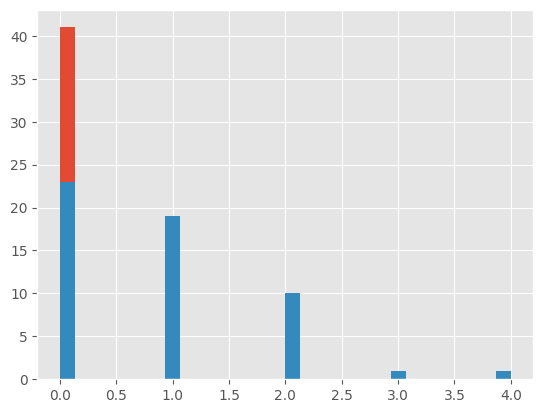

In [20]:
# --- Histogram berdasarkan gender ---
m = plt.hist(data[data["gender"] == 1].timeSpend, bins=30, fc=(1,0,0,0.5), label="Male")
f = plt.hist(data[data["gender"] == 0].timeSpend, bins=30, fc=(0,1,0,0.5), label="Female")

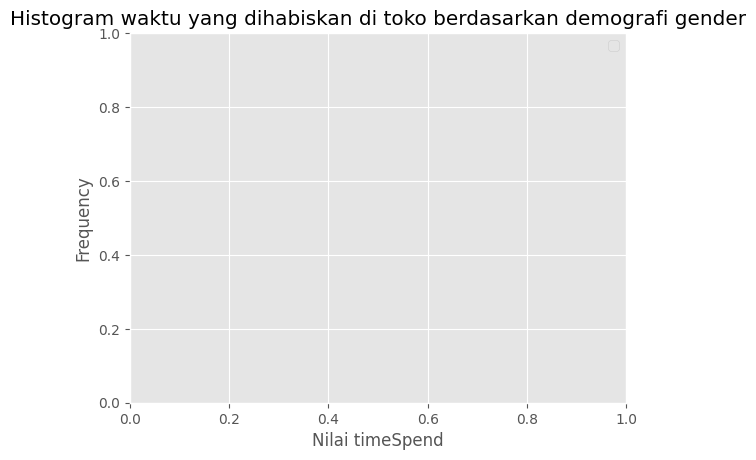

In [21]:
plt.legend()
plt.xlabel("Nilai timeSpend")
plt.ylabel("Frequency")
plt.title("Histogram waktu yang dihabiskan di toko berdasarkan demografi gender")
plt.show()

In [22]:
# --- Outliers untuk timeSpend (laki-laki) ---
male = data[data["gender"] == 1]
female = data[data["gender"] == 0]
desc = male.timeSpend.describe()
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Nilai di luar kisaran ini adalah outlier timeSpend: (", lower_bound, ",", upper_bound, ")")
print("Outliers:", male[(male.timeSpend < lower_bound) | (male.timeSpend > upper_bound)].timeSpend.values)

Nilai di luar kisaran ini adalah outlier timeSpend: ( -1.5 , 2.5 )
Outliers: [4]


In [23]:
# --- Outliers untuk visitNo (perempuan) ---
desc = female.visitNo.describe()
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Nilai di luar kisaran ini adalah outlier visitNo: (", lower_bound, ",", upper_bound, ")")
print("Outliers:", female[(female.visitNo < lower_bound) | (female.visitNo > upper_bound)].visitNo.values)

Nilai di luar kisaran ini adalah outlier visitNo: ( 0.5 , 4.5 )
Outliers: [0 0]


In [24]:
# --- Summary Statistics visitNo (laki-laki) ---
print("mean:", male.visitNo.mean())
print("variance:", male.visitNo.var())
print("standard deviation (std):", male.visitNo.std())
print("describe method:\n", male.visitNo.describe())

mean: 2.694915254237288
variance: 0.3535943892460547
standard deviation (std): 0.5946380321221093
describe method:
 count    59.000000
mean      2.694915
std       0.594638
min       1.000000
25%       3.000000
50%       3.000000
75%       3.000000
max       3.000000
Name: visitNo, dtype: float64


In [25]:
# --- Effect Size visitNo ---
mean_diff = male.visitNo.mean() - female.visitNo.mean()
var_male = male.visitNo.var()
var_female = female.visitNo.var()
var_pooled = (len(male)*var_male + len(female)*var_female) / float(len(male)+len(female))
effect_size = mean_diff / np.sqrt(var_pooled)
print("Effect size:", effect_size)

Effect size: 0.40638112114512326


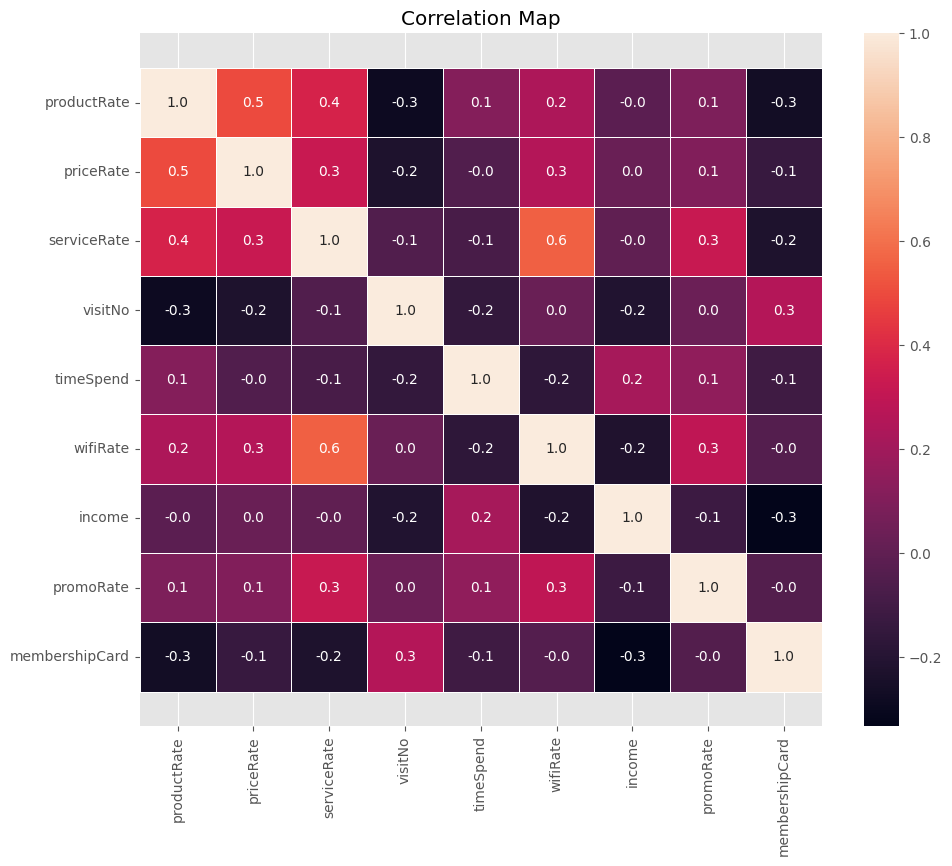

In [26]:
# --- Korelasi antar variabel ---
f, ax = plt.subplots(figsize=(11, 9))
dfs = data.loc[:, ['productRate','priceRate','serviceRate','visitNo','timeSpend','wifiRate','income','promoRate','membershipCard']]
sns.heatmap(dfs.corr(), annot=True, linewidths=0.5, fmt=".1f", ax=ax)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

In [27]:
# --- Covariance ---
print("Covariance diantara timeSpend dan income:", data.timeSpend.cov(data.income))
print("Covariance diantara timeSpend dan visitNo:", data.timeSpend.cov(data.visitNo))

Covariance diantara timeSpend dan income: 0.20077433628318603
Covariance diantara timeSpend dan visitNo: -0.09347345132743368


In [28]:
# --- Pearson Correlation (timeSpend & serviceRate) ---
p1 = data.loc[:, ["timeSpend", "serviceRate"]].corr(method="pearson")
p2 = data.serviceRate.cov(data.timeSpend) / (data.serviceRate.std() * data.timeSpend.std())
print('Pearson correlation (timeSpend vs serviceRate):')
print(p1)
print('Nilai pearson:', p2)

Pearson correlation (timeSpend vs serviceRate):
             timeSpend  serviceRate
timeSpend     1.000000    -0.081464
serviceRate  -0.081464     1.000000
Nilai pearson: -0.08146366260564268


In [29]:
# --- Pearson Correlation (wifiRate & serviceRate) ---
p1 = data.loc[:, ["wifiRate", "serviceRate"]].corr(method="pearson")
p2 = data.serviceRate.cov(data.wifiRate) / (data.serviceRate.std() * data.wifiRate.std())
print('Pearson correlation (wifiRate vs serviceRate):')
print(p1)
print('Nilai pearson:', p2)

Pearson correlation (wifiRate vs serviceRate):
             wifiRate  serviceRate
wifiRate     1.000000     0.555095
serviceRate  0.555095     1.000000
Nilai pearson: 0.5550950620398712


In [30]:
# --- Spearman Correlation (timeSpend & serviceRate) ---
s1 = data.loc[:, ["timeSpend", "serviceRate"]].corr(method="spearman")
print('Spearman correlation (timeSpend vs serviceRate):')
print(s1)

Spearman correlation (timeSpend vs serviceRate):
             timeSpend  serviceRate
timeSpend     1.000000    -0.092361
serviceRate  -0.092361     1.000000


In [31]:
# --- Spearman Correlation (priceRate & productRate) ---
s2 = data.loc[:, ["priceRate", "productRate"]].corr(method="spearman")
print('Spearman correlation (priceRate vs productRate):')
print(s2)

Spearman correlation (priceRate vs productRate):
             priceRate  productRate
priceRate     1.000000     0.452944
productRate   0.452944     1.000000
